<a href="https://colab.research.google.com/github/elena-andreini/TriesteItalyChapter_PlasticDebrisDetection/blob/main/task3-cleaning-and-preprocessing/MARIDA_and_Mados_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q rasterio folium geopandas shapely plotly kagglehub #necessary imports, some not present in colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.1 MB/s eta 0:00:00


Libraries installment

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import rasterio
from rasterio.plot import show
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point
import glob
import cv2
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import kagglehub
import zipfile
import shutil
from datetime import datetime
import re

Driver Connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive

MyDrive


Download Mados Data from Driver

###Mados Data

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path ="/content/drive/MyDrive/MADOS.zip"

# Directory to extract the files
extract_path = "/content"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content


In [ ]:
print("Dataset downloaded to:", extract_path)
print("Contents of the path:", os.listdir(extract_path))

Dataset downloaded to: /content
Contents of the path: ['.config', 'drive', 'MADOS', 'sample_data']


In [ ]:
import os

def get_folder_size_gb(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            total_size += os.path.getsize(file_path)

    # Convert bytes to gigabytes (1 GB = 1024 * 1024 * 1024 bytes)
    size_gb = total_size / (1024 ** 3)
    return size_gb

# Example usage:
folder_path = '/content/MADOS'
size_gb = get_folder_size_gb(folder_path)
print(f"Size of folder '{folder_path}': {size_gb:.2f} GB")

Size of folder '/content/MADOS': 5.36 GB


In [ ]:
mados_path = "/content/MADOS/splits"
print("Contents of MADOS directory:", os.listdir(mados_path))



Contents of MADOS directory: ['train_X.txt', 'test_X.txt', 'val_X.txt']


In [ ]:
import os

extract_path = "/content/MADOS"  # Replace with the actual path
print("Contents of the extracted directory:")
print(os.listdir(extract_path))

Contents of the extracted directory:
['Scene_59', 'Scene_41', 'Scene_157', 'Scene_43', 'Scene_160', 'Scene_101', 'Scene_78', 'Scene_60', 'Scene_1', 'Scene_23', 'Scene_118', 'Scene_24', 'Scene_156', 'Scene_61', 'Scene_168', 'Scene_93', 'Scene_116', 'Scene_119', 'Scene_146', 'Scene_21', 'Scene_18', 'Scene_46', 'Scene_27', 'Scene_133', 'Scene_143', 'Scene_110', 'Scene_120', 'Scene_54', 'Scene_51', 'Scene_57', 'Scene_158', 'Scene_66', 'Scene_26', 'Scene_111', 'Scene_7', 'Scene_136', 'Scene_56', 'Scene_32', 'Scene_83', 'Scene_130', 'Scene_124', 'Scene_34', 'Scene_81', 'Scene_88', 'Scene_145', 'Scene_138', 'Scene_127', 'Scene_29', 'Scene_3', 'Scene_112', 'Scene_163', 'Scene_92', 'Scene_151', 'Scene_139', 'Scene_82', 'Scene_36', 'Scene_142', 'Scene_22', 'Scene_38', 'splits', 'Scene_25', 'Scene_77', 'Scene_85', 'Scene_45', 'Scene_105', 'Scene_165', 'Scene_40', 'Scene_164', 'Scene_68', 'Scene_84', 'Scene_44', 'Scene_122', 'Scene_19', 'Scene_55', 'Scene_170', 'Scene_135', 'Scene_94', 'Scene_14',

Explor the data of scene 0

In [ ]:
'''import os

# Define the path to Scene_0
scene_0_path = "/content/mados_data/MADOS/Scene_0"

# Function to print the folder structure
def print_folder_structure(folder_path, indent=""):
    print(f"{indent}{os.path.basename(folder_path)}/")
    indent += "    "
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path):
            print_folder_structure(item_path, indent)
        else:
            print(f"{indent}{item}")

# Function to analyze file types and content

###def analyze_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            print(f"\nFile: {file_path}")
            if file.endswith("_conf_CROP.tif"):
                print("  Type: Confidence file")
                # Add logic to read and process _conf files if needed
            elif file.endswith("_rep_CROP.tif"):
                print("  Type: Report file")
                # Add logic to read and process _rep files if needed
            elif file.endswith("_cl_CROP.tif"):
                print("  Type: Class file")
                # Add logic to read and process _cl files if needed
            else:
                print("  Type: Other file")###

# Print the folder structure
#print("Folder Structure:")
#print_folder_structure(scene_0_path)

# Analyze files in Scene_0
#print("\nAnalyzing Files:")
#analyze_files(scene_0_path)'''

'import os\n\n# Define the path to Scene_0\nscene_0_path = "/content/mados_data/MADOS/Scene_0"\n\n# Function to print the folder structure\ndef print_folder_structure(folder_path, indent=""):\n    print(f"{indent}{os.path.basename(folder_path)}/")\n    indent += "    "\n    for item in os.listdir(folder_path):\n        item_path = os.path.join(folder_path, item)\n        if os.path.isdir(item_path):\n            print_folder_structure(item_path, indent)\n        else:\n            print(f"{indent}{item}")\n\n# Function to analyze file types and content\n\n###def analyze_files(folder_path):\n    for root, dirs, files in os.walk(folder_path):\n        for file in files:\n            file_path = os.path.join(root, file)\n            print(f"\nFile: {file_path}")\n            if file.endswith("_conf_CROP.tif"):\n                print("  Type: Confidence file")\n                # Add logic to read and process _conf files if needed\n            elif file.endswith("_rep_CROP.tif"):\n         

In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
EXTRACT_PATH = "/content/MADOS"  # Replace with the real path


# Count files in each resolution folder
scene_counts = {}
class_counts = {i: 0 for i in range(16)}  # 16 classes in MADOS

for scene in os.listdir(EXTRACT_PATH):
    scene_path = os.path.join(EXTRACT_PATH, scene)

    if not os.path.isdir(scene_path):  # Skip non-directory files
        continue

    scene_counts[scene] = {"10m": 0, "20m": 0, "60m": 0}

    for res in ["10", "20", "60"]:
        res_path = os.path.join(scene_path, res)
        if os.path.exists(res_path):
            files = os.listdir(res_path)
            scene_counts[scene][f"{res}m"] = len(files)

            # Check classification masks (_cl_CROP.tif)
            for file in files:
                if file.endswith("_cl_CROP.tif"):
                    with rasterio.open(os.path.join(res_path, file)) as cl_mask:
                        mask_data = cl_mask.read(1)
                        unique, counts = np.unique(mask_data, return_counts=True)
                        for u, c in zip(unique, counts):
                            class_counts[u] += c  # Count pixels per class

# Print scene distribution
#print("Scene and File Distribution:")
for scene, counts in scene_counts.items():
     f"{scene}: {counts}"

# Print class distribution
print("\nClass Distribution (Pixel Counts):")
for class_id, count in class_counts.items():
    f"Class {class_id}: {count} pixels"

# Plot class distribution
#plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
#plt.xlabel("Class ID")
#plt.ylabel("Pixel Count")
##plt.title("Class Distribution in MADOS")
#plt.xticks(range(16))
#plt.show()



Class Distribution (Pixel Counts):


In [ ]:
# Set up the environment
import warnings
warnings.filterwarnings('ignore')

Delete DataBase

In [ ]:
#import shutil

'''dataset_path = "/content/MADOS " # Adjust if needed

if os.path.exists("/content/MADOS"):
    shutil.rmtree("/content/MADOS")

    print("MADOS dataset deleted successfully.")
else:
    print("Dataset not found, nothing to delete.")'''


'dataset_path = "/content/MADOS " # Adjust if needed\n\nif os.path.exists("/content/MADOS"):\n    shutil.rmtree("/content/MADOS")\n\n    print("MADOS dataset deleted successfully.")\nelse:\n    print("Dataset not found, nothing to delete.")'

Download Marida Database

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path1 ="/content/drive/MyDrive/MARIDA.zip"

# Directory to extract the files
extract_path1 = "/content/marida_data"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
    zip_ref.extractall(extract_path1)

print(f"Files extracted to: {extract_path1}")

Files extracted to: /content/marida_data


In [ ]:
print("Dataset downloaded to:", extract_path1)
print("Contents of the path:", os.listdir(extract_path1))


Dataset downloaded to: /content/marida_data
Contents of the path: ['splits', 'labels_mapping.txt', 'patches', 'shapefiles']


To Visualize images and content

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 240, 'height': 240, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Unique values: [0.16726452 0.1886762  0.25073877 ... 2.3032045  2.3139286  2.358803  ]
Min/Max: 0.16726452 2.358803


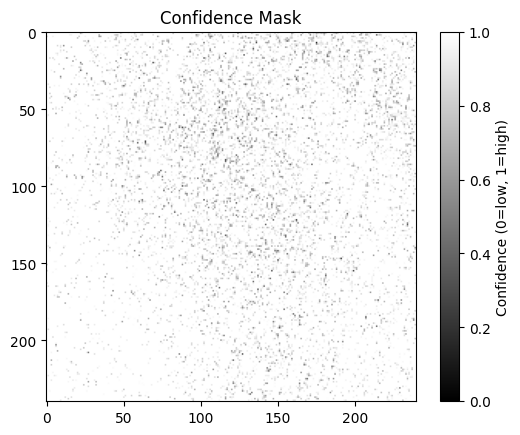

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file
file_path = "/content/MADOS/Scene_104/10/Scene_104_L2W_TUR_Nechad2016_665_9.tif"
with rasterio.open(file_path) as src:
    conf_data = src.read(1)  # Read the first band
    print("Metadata:", src.meta)  # Check dtype, shape, etc.
    print("Unique values:", np.unique(conf_data))
    print("Min/Max:", np.min(conf_data), np.max(conf_data))

    # Visualize
    plt.imshow(conf_data, cmap='gray', vmin=0, vmax=1)
    plt.colorbar(label='Confidence (0=low, 1=high)')
    plt.title("Confidence Mask")
    plt.show()

In [ ]:
import rasterio

with rasterio.open('/content/MADOS/Scene_0/10/Scene_0_L2R_cl_9.tif') as src:
        num_bands = src.count
        print("Number of bands:", num_bands)

Number of bands: 1


In [ ]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Open the classification label file
cl_file = "/content/MADOS/Scene_0/10/Scene_0_L2R_cl_1.tif"
with rasterio.open(cl_file) as src:
    cl_data = src.read(1)
    print("Label metadata:", src.meta)
    print("Unique label values:", np.unique(cl_data))

Label metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 240, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Unique label values: [0 6]


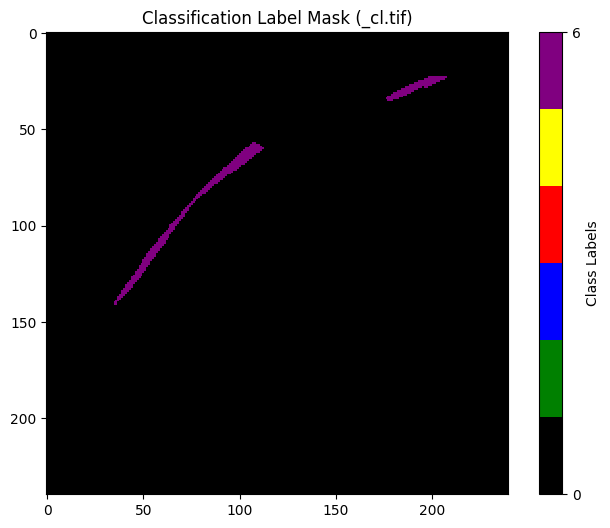

In [ ]:
# Create a color map for visualization (adjust colors to match your classes)
from matplotlib.colors import ListedColormap
class_colors = ['black', 'green', 'blue', 'red', 'yellow', 'purple']  # Example for 6 classes
cmap = ListedColormap(class_colors)

plt.figure(figsize=(8, 6))
plt.imshow(cl_data, cmap=cmap, interpolation='none')
plt.colorbar(ticks=np.unique(cl_data), label='Class Labels')
plt.title("Classification Label Mask (_cl.tif)")
plt.show()

In [ ]:
import rasterio
conf_data = rasterio.open("/content/MADOS/Scene_0/10/Scene_0_L2R_cl_1.tif").read(1)  # Reads the first band
print(conf_data[10, 20])  # Prints confidence at pixel (10, 20), e.g., `0.7`

0


In [ ]:
import os

# Define dataset base directory
base_dir = "/content/marida_data"

# Define important subdirectories
patches_dir = os.path.join(base_dir, "patches")
splits_dir = os.path.join(base_dir, "splits")
labels_file = os.path.join(base_dir, "labels_mapping.txt")

# Check dataset structure
print("Dataset Structure:")
print(f"Patches Directory: {os.listdir(patches_dir)[:5]}" if os.path.exists(patches_dir) else "Patches Directory Not Found")
print(f"Splits Directory: {os.listdir(splits_dir) if os.path.exists(splits_dir) else 'Splits Directory Not Found'}")
print(f"Labels Mapping File: {'Found' if os.path.exists(labels_file) else 'Not Found'}")


Dataset Structure:
Patches Directory: ['S2_24-8-20_16PCC', 'S2_19-9-18_16PCC', 'S2_7-10-18_52SDD', 'S2_17-7-16_51PTS', 'S2_24-10-18_16PDC']
Splits Directory: ['train_X.txt', 'test_X.txt', 'val_X.txt']
Labels Mapping File: Found


In [ ]:
modos_class_mapping = {
    1: 'Marine Debris',
    2: 'Dense Sargassum',
    3: 'Sparse Sargassum',
    4: 'Natural Organic Material',
    5: 'Ship',
    6: 'Clouds',
    7: 'Marine Water',
    8: 'Sediment-Laden Water',
    9: 'Foam',
    10: 'Turbid Water',
    11: 'Shallow Water',
    12: 'Waves',
    13: 'Cloud Shadows',
    14: 'Wakes',
    15: 'Mixed Water'
}

In [ ]:
# Define color mapping for visualization (used Deep seek for this)
modos_color_mapping = {
    1: (255, 0, 0),      # Marine Debris - Red
    2: (0, 128, 0),      # Dense Sargassum - Green
    3: (144, 238, 144),  # Sparse Sargassum - Light Green
    4: (139, 69, 19),    # Natural Organic Material - Brown
    5: (128, 128, 128),  # Ship - Gray
    6: (255, 255, 255),  # Clouds - White
    7: (0, 0, 255),      # Marine Water - Blue
    8: (210, 180, 140),  # Sediment-Laden Water - Tan
    9: (255, 255, 224),  # Foam - Light Yellow
    10: (64, 224, 208),  # Turbid Water - Turquoise
    11: (176, 224, 230), # Shallow Water - Powder Blue
    12: (0, 191, 255),   # Waves - Deep Sky Blue
    13: (105, 105, 105), # Cloud Shadows - Dim Gray
    14: (220, 220, 220), # Wakes - Gainsboro
    15: (70, 130, 180)   # Mixed Water - Steel Blue
}

In [ ]:
marida_class_mapping = {
    1: 'Marine Debris',
2: 'Dense Sargassum',
3: 'Sparse Sargassum',
4: 'Natural Organic Material',
5: 'Ship',
6: 'Clouds',
7: 'Marine Water',
8: 'Sediment-Laden Water',
9: 'Foam',
10: 'Turbid Water',
11: 'Shallow Water',
12: 'Waves',
13: 'Cloud Shadows',
14: 'Wakes',
15: 'Mixed Water'
}

In [ ]:
marida_color_mapping = {
    1: (255, 0, 0),       # Plastic Debris - Red
    2: (255, 165, 0),     # Floating Objects - Orange
    3: (0, 128, 0),       # Algae - Green
    4: (139, 69, 19),     # Natural Organic Material - Brown
    5: (128, 128, 128),   # Ships - Gray
    6: (255, 255, 255),   # Clouds - White
    7: (0, 0, 255),       # Water - Blue
    8: (210, 180, 140),   # Sediment - Tan
    9: (255, 255, 224),   # Foam - Light Yellow
    10: (64, 224, 208),   # Turbid Water - Turquoise
    11: (173, 216, 230),  # Shallow Water - Light Blue
    12: (0, 191, 255),    # Waves - Deep Sky Blue
    13: (105, 105, 105),  # Cloud Shadows - Dim Gray
    14: (220, 220, 220),  # Wakes - Gainsboro
    15: (70, 130, 180)    # Mixed Water - Steel Blue
}

In [ ]:
# Create a mapping between MARIDA and MADOS classes
common_class_mapping = {}

# Compare classes and create a common mapping
for marida_id, marida_class in marida_class_mapping.items():
    for mados_id, mados_class in modos_class_mapping.items():
        if marida_class.lower() == mados_class.lower():
            common_class_mapping[marida_id] = mados_id
            break

# Print the common class mapping
print("Common Class Mapping:")
for marida_id, mados_id in common_class_mapping.items():
    print(f"MARIDA Class {marida_id}: {marida_class_mapping[marida_id]} -> MADOS Class {mados_id}: {modos_class_mapping[mados_id]}")

# Handle mismatched classes
marida_unique_classes = set(marida_class_mapping.values()) - set(modos_class_mapping.values())
modos_unique_classes = set(modos_class_mapping.values()) - set(marida_class_mapping.values())

print("\nMARIDA Unique Classes:")
for cls in marida_unique_classes:
    print(f"- {cls}")

print("\nMADOS Unique Classes:")
for cls in modos_unique_classes:
    print(f"- {cls}")

# Example: Merge datasets based on common classes
def merge_datasets(marida_data, mados_data, common_class_mapping):
    merged_data = []

    # Add MARIDA data
    for marida_sample in marida_data:
        marida_class_id = marida_sample['class']
        if marida_class_id in common_class_mapping:
            merged_data.append({
                'image': marida_sample['image'],
                'class': common_class_mapping[marida_class_id],  # Use mapped MADOS class ID
                'source': 'MARIDA'
            })

    # Add MADOS data
    for mados_sample in mados_data:
        mados_class_id = mados_sample['class']
        # Check if this MADOS class ID is in the values of our mapping
        if mados_class_id in common_class_mapping.values():
            merged_data.append({
                'image': mados_sample['image'],
                'class': mados_class_id,
                'source': 'MADOS'
            })

    return merged_data

Common Class Mapping:
MARIDA Class 1: Marine Debris -> MADOS Class 1: Marine Debris
MARIDA Class 2: Dense Sargassum -> MADOS Class 2: Dense Sargassum
MARIDA Class 3: Sparse Sargassum -> MADOS Class 3: Sparse Sargassum
MARIDA Class 4: Natural Organic Material -> MADOS Class 4: Natural Organic Material
MARIDA Class 5: Ship -> MADOS Class 5: Ship
MARIDA Class 6: Clouds -> MADOS Class 6: Clouds
MARIDA Class 7: Marine Water -> MADOS Class 7: Marine Water
MARIDA Class 8: Sediment-Laden Water -> MADOS Class 8: Sediment-Laden Water
MARIDA Class 9: Foam -> MADOS Class 9: Foam
MARIDA Class 10: Turbid Water -> MADOS Class 10: Turbid Water
MARIDA Class 11: Shallow Water -> MADOS Class 11: Shallow Water
MARIDA Class 12: Waves -> MADOS Class 12: Waves
MARIDA Class 13: Cloud Shadows -> MADOS Class 13: Cloud Shadows
MARIDA Class 14: Wakes -> MADOS Class 14: Wakes
MARIDA Class 15: Mixed Water -> MADOS Class 15: Mixed Water

MARIDA Unique Classes:

MADOS Unique Classes:


Extracted Mados data to image,_cl,_conf

In [ ]:
import os
from pathlib import Path
import shutil
from tqdm import tqdm

# Base directory
base_dir = Path("/content/MADOS")
output_dir = Path("/content/extracted_data_Mados")

# Create main output subfolders
(output_dir / "images").mkdir(parents=True, exist_ok=True)
(output_dir / "conf").mkdir(parents=True, exist_ok=True)
(output_dir / "cl").mkdir(parents=True, exist_ok=True)

def process_scene(scene_path):
    """Copy files to organized subfolders without renaming"""
    for file_path in scene_path.glob("*"):
        # Handle both .png and .tif RGB files
        if "_rgb_" in file_path.name.lower() and file_path.suffix.lower() in ('.png', '.tif'):
            shutil.copy2(file_path, output_dir / "images" / file_path.name)
        elif "_conf_" in file_path.name.lower() and file_path.suffix.lower() == '.tif':
            shutil.copy2(file_path, output_dir / "conf" / file_path.name)
        elif "_cl_" in file_path.name.lower() and file_path.suffix.lower() == '.tif':
            shutil.copy2(file_path, output_dir / "cl" / file_path.name)

# Process all scenes from 0 to 173
for scene_num in tqdm(range(174), desc="Processing Scenes"):
    scene_path = base_dir / f"Scene_{scene_num}"

    if scene_path.exists():
        # Process each subdirectory (10, 20, etc.) within the scene
        for subdir in scene_path.glob("*/"):
            if subdir.is_dir():
                process_scene(subdir)
    else:
        print(f"Scene {scene_num} not found, skipping...")

print("\nExtraction complete!")
print(f"Files organized in:\n{output_dir}/")
print("├── images/  (All *_rgb_*.png and *_rgb_*.tif files)")
print("├── conf/    (All *_conf_*.tif files)")
print("└── cl/      (All *_cl_*.tif files)")

Processing Scenes: 100%|██████████| 174/174 [00:16<00:00, 10.27it/s]


Extraction complete!
Files organized in:
/content/extracted_data_Mados/
├── images/  (All *_rgb_*.png and *_rgb_*.tif files)
├── conf/    (All *_conf_*.tif files)
└── cl/      (All *_cl_*.tif files)


In [ ]:
import os
from pathlib import Path
import shutil
from tqdm import tqdm

# Base directories
base_dir = Path("/content/marida_data")
patches_dir = base_dir / "patches"  # Note: Changed from 'patches' to 'patches'
output_dir = Path("/content/extracted_data_Marida")

# Create output folders
(output_dir / "images").mkdir(parents=True, exist_ok=True)
(output_dir / "conf").mkdir(parents=True, exist_ok=True)
(output_dir / "cl").mkdir(parents=True, exist_ok=True)

def classify_and_copy(file_path):
    """Strict classification and copying of files"""
    filename = file_path.name.lower()

    # Confidence maps (must contain '_conf')
    if '_conf' in filename:
        dest = output_dir / "conf"
        shutil.copy2(file_path, dest / file_path.name)
        return "conf"

    # CL maps (must contain '_cl')
    elif '_cl' in filename:
        dest = output_dir / "cl"
        shutil.copy2(file_path, dest / file_path.name)
        return "cl"

    # All other files go to images
    else:
        dest = output_dir / "images"
        shutil.copy2(file_path, dest / file_path.name)
        return "image"

# Process each patch subfolder
patch_subfolders = [d for d in patches_dir.iterdir() if d.is_dir()]
print(f"Found {len(patch_subfolders)} patch subfolders")

classification_counts = {"image": 0, "conf": 0, "cl": 0}

for patch_folder in tqdm(patch_subfolders, desc="Processing patches"):
    for file_path in patch_folder.glob("*"):
        if file_path.is_file():
            result = classify_and_copy(file_path)
            classification_counts[result] += 1

# Verification
print("\nFinal Classification:")
print(f"Images:      {classification_counts['image']} files")
print(f"Confidence:  {classification_counts['conf']} files")
print(f"CL maps:     {classification_counts['cl']} files")

# Show 3 samples from each folder
def show_samples(folder, count=3):
    files = list((output_dir / folder).glob("*"))
    print(f"\nSample {folder} files:")
    for f in files[:count]:
        print(f" - {f.name}")

show_samples("images")
show_samples("conf")
show_samples("cl")

Found 63 patch subfolders


Processing patches: 100%|██████████| 63/63 [00:50<00:00,  1.25it/s]


Final Classification:
Images:      1381 files
Confidence:  1381 files
CL maps:     1381 files

Sample images files:
 - S2_3-11-16_16PDC_31.tif
 - S2_24-10-18_16PDC_8.tif
 - S2_27-1-19_16PCC_6.tif

Sample conf files:
 - S2_22-12-20_18QYF_0_conf.tif
 - S2_30-8-17_16PCC_11_conf.tif
 - S2_12-12-20_16PCC_22_conf.tif

Sample cl files:
 - S2_18-9-20_16PCC_1_cl.tif
 - S2_12-12-20_16PCC_3_cl.tif
 - S2_4-9-16_16PCC_19_cl.tif


Now we will explora how many images contain debris in marida and mados .

Mados

In [ ]:
import rasterio
import numpy as np
import os

# Define path to the directory containing the files
input_dir = "/content/extracted_data_Mados/cl"

# Define the class number for marine debris (assuming class 1 represents marine debris)
marine_debris_class = 1

# Initialize counter for images with marine debris
images_with_debris = 0

# Function to read and process a single file
def process_scene(file_path):
    global images_with_debris

    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band (assuming it's the class layer)

        # Count the number of marine debris pixels (class number 1)
        marine_debris_pixels = np.sum(image == marine_debris_class)

        # Only print and count if marine debris is detected
        if marine_debris_pixels > 0:
            images_with_debris += 1
           # print(f"{os.path.basename(file_path)}: {marine_debris_pixels} marine debris pixels")

# Process all files in the directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.tif'):
        file_path = os.path.join(input_dir, file_name)
        process_scene(file_path)

# Print total count of images with debris
print(f"\nTotal images with marine debris detected: {images_with_debris}")



Total images with marine debris detected: 472


Marida

In [ ]:
import rasterio
import numpy as np
import os

# Define path to the directory containing the files
input_dir = "/content/extracted_data_Marida/cl"

# Define the class number for marine debris (assuming class 1 represents marine debris)
marine_debris_class = 1

# Initialize counter for images with marine debris
images_with_debris = 0

# Function to read and process a single file
def process_scene(file_path):
    global images_with_debris

    with rasterio.open(file_path) as src:
        image = src.read(1)  # Read the first band (assuming it's the class layer)

        # Count the number of marine debris pixels (class number 1)
        marine_debris_pixels = np.sum(image == marine_debris_class)

        # Only print and count if marine debris is detected
        if marine_debris_pixels > 0:
            images_with_debris += 1
           # print(f"{os.path.basename(file_path)}: {marine_debris_pixels} marine debris pixels")

# Process all files in the directory
for file_name in os.listdir(input_dir):
    if file_name.endswith('.tif'):
        file_path = os.path.join(input_dir, file_name)
        process_scene(file_path)

# Print total count of images with debris
print(f"\nTotal images with marine debris detected: {images_with_debris}")


Total images with marine debris detected: 373


spectral analysis

Starting analysis...


Analyzing class distribution: 100%|██████████| 50/50 [00:00<00:00, 363.98it/s]


Class distribution (based on 50 samples):
  10: Turbid Water - 0.21%
  7: Marine Water - 0.19%
  6: Oil Spill - 0.10%
  13: Oil Platform - 0.02%
  5: Ship - 0.01%
  15: Sea snot - 0.01%
  12: Waves & Wakes - 0.01%
  9: Foam - 0.01%
  8: Sediment-Laden Water - 0.01%
  1: Marine Debris - 0.00%
  2: Dense Sargassum - 0.00%
  4: Natural Organic Material - 0.00%
  3: Sparse Floating Algae - 0.00%
  11: Shallow Water - 0.00%
  14: Jellyfish - 0.00%


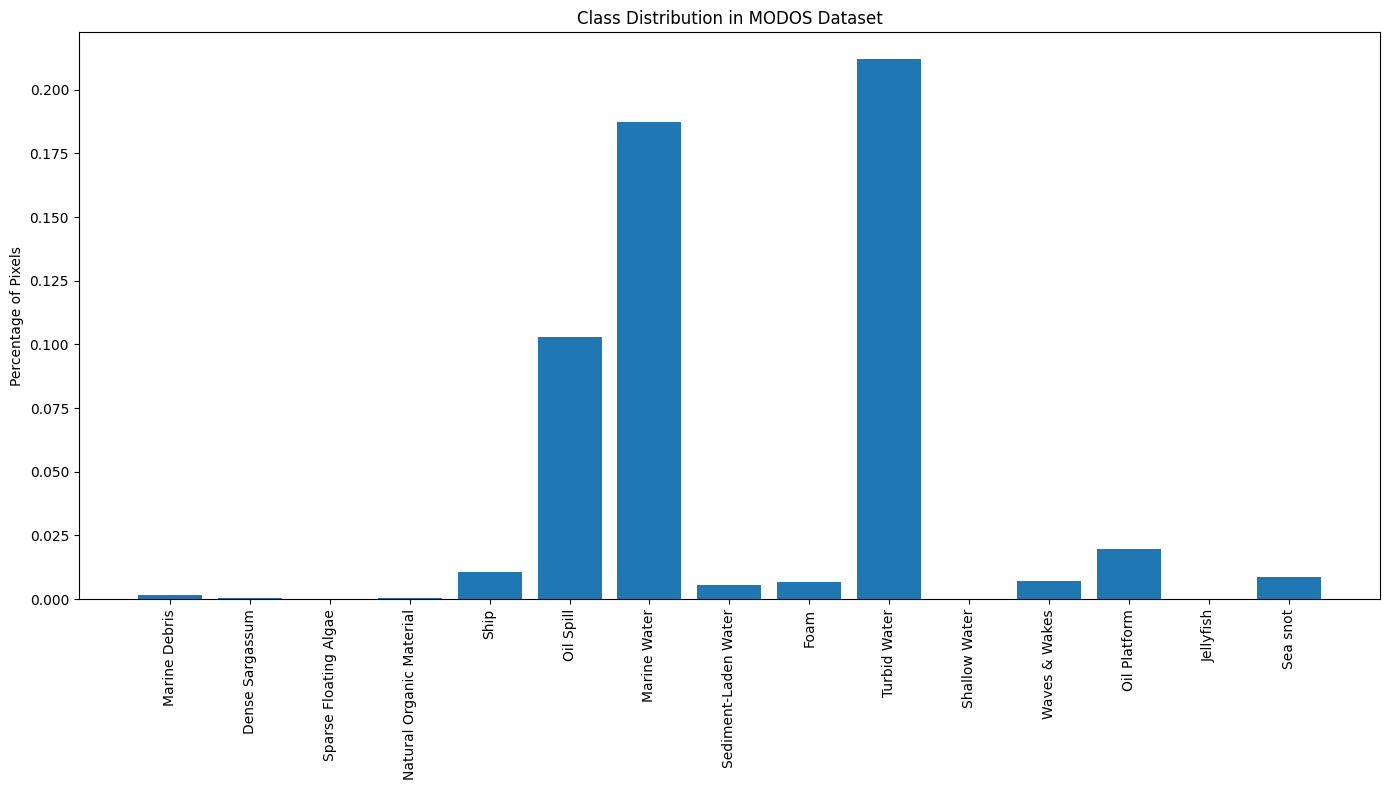


Debris vs. Non-debris:
  Marine Debris: 0.00%
  Non-debris: 0.56%


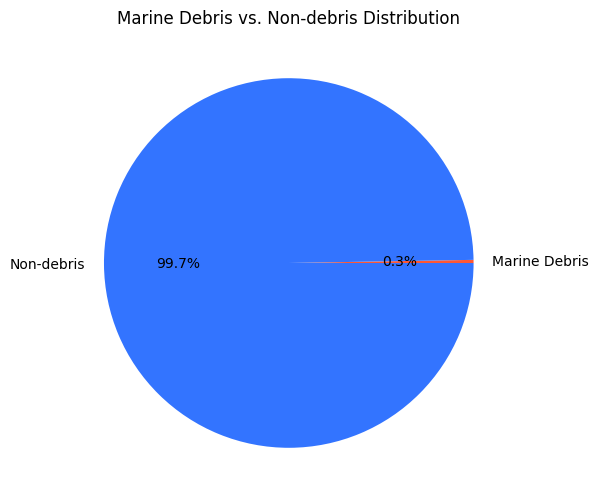

Analyzing spectral signatures: 100%|██████████| 20/20 [00:00<00:00, 9070.73it/s]


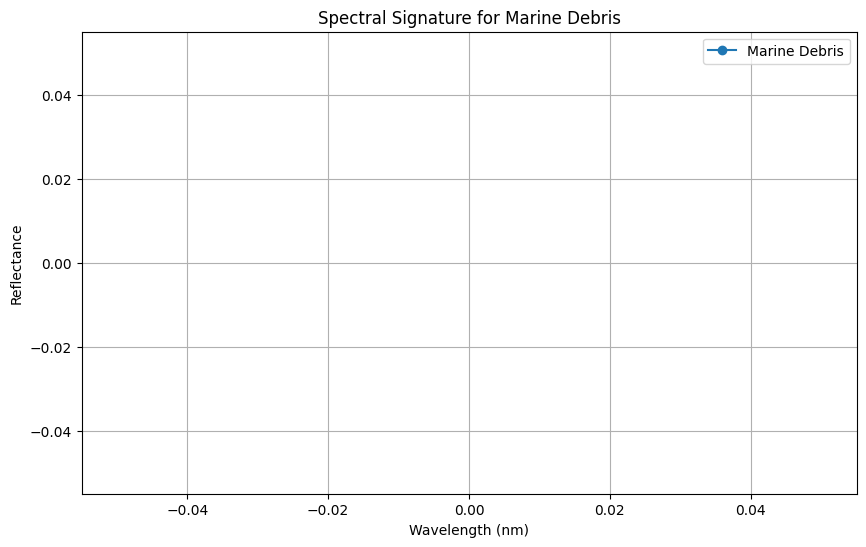

In [ ]:
import os
import numpy as np
import rasterio
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Define paths and class mapping
base_dir = Path("/content/extracted_data_Mados")
class_mapping = {
    1: 'Marine Debris',
    2: 'Dense Sargassum',
    3: 'Sparse Floating Algae',
    4: 'Natural Organic Material',
    5: 'Ship',
    6: 'Oil Spill',
    7: 'Marine Water',
    8: 'Sediment-Laden Water',
    9: 'Foam',
    10: 'Turbid Water',
    11: 'Shallow Water',
    12: 'Waves & Wakes',
    13: 'Oil Platform',
    14: 'Jellyfish',
    15: 'Sea snot'
}

def analyze_class_distribution(sample_size=50):
    """Analyze the distribution of classes in the MODOS dataset"""
    # Get list of all classification files
    cl_files = list((base_dir / "cl").glob("*.tif"))

    # Randomly sample files for analysis
    if len(cl_files) > sample_size:
        cl_files_sample = random.sample(cl_files, sample_size)
    else:
        cl_files_sample = cl_files

    # Initialize class counts
    class_counts = {i: 0 for i in range(1, 16)}
    total_pixels = 0

    for cl_file in tqdm(cl_files_sample, desc="Analyzing class distribution"):
        with rasterio.open(cl_file) as src:
            mask_data = src.read(1)

            # Count class pixels
            for class_id in range(1, 16):
                class_counts[class_id] += np.sum(mask_data == class_id)

            total_pixels += mask_data.size

    # Calculate percentages
    class_percentages = {class_id: count / total_pixels * 100
                        for class_id, count in class_counts.items()}

    # Print results
    print(f"\nClass distribution (based on {len(cl_files_sample)} samples):")
    for class_id, percentage in sorted(class_percentages.items(),
                                     key=lambda x: x[1], reverse=True):
        print(f"  {class_id}: {class_mapping[class_id]} - {percentage:.2f}%")

    # Plot class distribution
    plt.figure(figsize=(14, 8))
    plt.bar(
        [class_mapping[i] for i in range(1, 16)],
        [class_percentages[i] for i in range(1, 16)]
    )
    plt.xticks(rotation=90)
    plt.ylabel("Percentage of Pixels")
    plt.title("Class Distribution in MODOS Dataset")
    plt.tight_layout()
    plt.savefig(base_dir / "class_distribution.png")
    plt.show()

    # Calculate debris vs non-debris
    debris_percentage = class_percentages[1]
    non_debris_percentage = sum([p for i, p in class_percentages.items() if i != 1])

    print(f"\nDebris vs. Non-debris:")
    print(f"  Marine Debris: {debris_percentage:.2f}%")
    print(f"  Non-debris: {non_debris_percentage:.2f}%")

    # Plot debris vs non-debris
    plt.figure(figsize=(10, 6))
    plt.pie([debris_percentage, non_debris_percentage],
            labels=['Marine Debris', 'Non-debris'],
            autopct='%1.1f%%',
            colors=['#FF5733', '#3374FF'])
    plt.title("Marine Debris vs. Non-debris Distribution")
    plt.savefig(base_dir / "debris_vs_non_debris.png")
    plt.show()

    return class_percentages

def spectral_analysis(class_id=1, sample_size=20):
    """Perform spectral analysis for a specific class"""
    # Get corresponding RGB and classification files
    cl_files = list((base_dir / "cl").glob("*.tif"))
    rgb_files = [base_dir / "images" / f.name.replace("_cl_", "_rgb_").replace(".tif", ".png")
                for f in cl_files]

    # Find files containing the target class
    target_files = []
    for cl_file in tqdm(cl_files, desc="Finding target class samples"):
        with rasterio.open(cl_file) as src:
            data = src.read(1)
            if np.any(data == class_id):
                target_files.append(cl_file)
                if len(target_files) >= sample_size:
                    break

    if not target_files:
        print(f"No samples found for class {class_id}")
        return

    # Initialize spectral stats
    band_stats = {
        '492': {'mean': [], 'std': []},
        '559': {'mean': [], 'std': []},
        '665': {'mean': [], 'std': []},
        '833': {'mean': [], 'std': []}
    }

    # Analyze spectral signatures
    for cl_file in tqdm(target_files, desc="Analyzing spectral signatures"):
        scene_id = cl_file.name.split('_')[1]
        tile_id = cl_file.stem.split('_')[-1]

        # Get corresponding reflectance files
        for band in band_stats.keys():
            band_file = base_dir / "images" / f"Scene_{scene_id}_L2R_rhorc_{band}_{tile_id}.tif"
            if band_file.exists():
                with rasterio.open(band_file) as src:
                    band_data = src.read(1)
                    mask = (cl_data == class_id)
                    if np.any(mask):
                        band_stats[band]['mean'].append(np.mean(band_data[mask]))
                        band_stats[band]['std'].append(np.std(band_data[mask]))

    # Calculate average spectral signature
    spectral_profile = {
        band: {
            'mean': np.mean(stats['mean']),
            'std': np.mean(stats['std'])
        }
        for band, stats in band_stats.items()
    }

    # Plot spectral signature
    plt.figure(figsize=(10, 6))
    wavelengths = [492, 559, 665, 833]
    means = [spectral_profile[str(b)]['mean'] for b in wavelengths]
    stds = [spectral_profile[str(b)]['std'] for b in wavelengths]

    plt.plot(wavelengths, means, 'o-', label=class_mapping[class_id])
    plt.fill_between(wavelengths,
                    np.array(means)-np.array(stds),
                    np.array(means)+np.array(stds),
                    alpha=0.2)

    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    plt.title(f"Spectral Signature for {class_mapping[class_id]}")
    plt.legend()
    plt.grid(True)
    plt.savefig(base_dir / f"spectral_signature_class_{class_id}.png")
    plt.show()

    return spectral_profile

# Run analyses
print("Starting analysis...")
class_dist = analyze_class_distribution()
debris_spectrum = spectral_analysis(class_id=1)  # Marine Debris

Starting marine debris image processing pipeline...
Scanning 2803 mask files for debris...


100%|██████████| 2803/2803 [00:05<00:00, 469.22it/s]



Found 0 images with ≥50 debris pixels


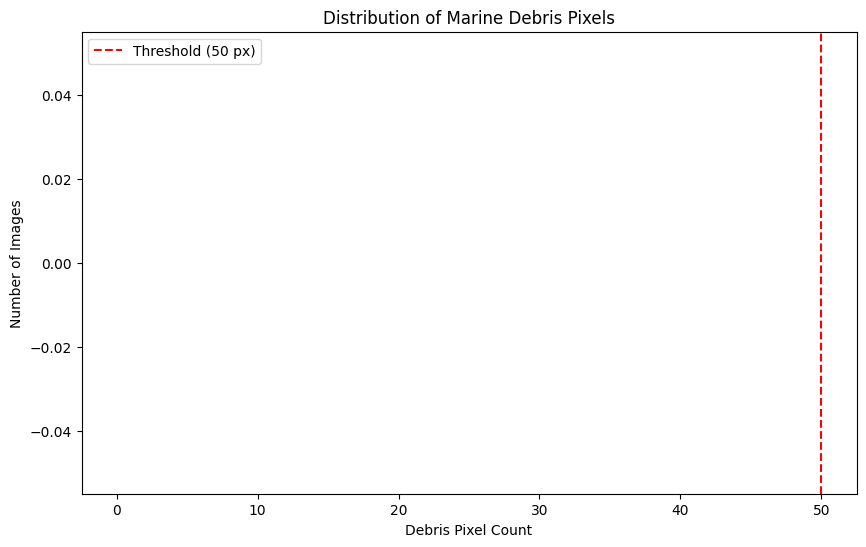


Excluded 0 MARIDA-overlapping images

Upsampling with bilinear interpolation...


0it [00:00, ?it/s]


Validating resampling results...

Processing complete!
Processed data saved to: /content/processed_data


In [ ]:
import os
import numpy as np
import rasterio
from rasterio.enums import Resampling
from pathlib import Path
from tqdm import tqdm
import shutil
import matplotlib.pyplot as plt
from skimage.transform import resize

# Configuration
BASE_DIR = Path("/content/extracted_data_Mados")
OUTPUT_DIR = Path("/content/processed_data")
DEBRIS_THRESHOLD = 50  # Minimum debris pixels to keep
DEBRIS_CLASS_ID = 1    # MADOS class ID for marine debris

# Create output directories
OUTPUT_DIR.mkdir(exist_ok=True)
(OUTPUT_DIR / "10m").mkdir(exist_ok=True)
(OUTPUT_DIR / "20m").mkdir(exist_ok=True)
(OUTPUT_DIR / "60m").mkdir(exist_ok=True)
(OUTPUT_DIR / "masks").mkdir(exist_ok=True)

def filter_debris_images():
    """Filter images containing marine debris above threshold"""
    debris_images = []
    cl_files = list((BASE_DIR / "cl").glob("*.tif"))

    print(f"Scanning {len(cl_files)} mask files for debris...")

    for cl_file in tqdm(cl_files):
        with rasterio.open(cl_file) as src:
            mask = src.read(1)
            debris_pixels = np.sum(mask == DEBRIS_CLASS_ID)

            if debris_pixels >= DEBRIS_THRESHOLD:
                # Extract scene information from filename
                parts = cl_file.stem.split('_')
                scene_id = parts[1]
                tile_id = parts[-1]

                # Find all resolution versions
                resolutions = []
                for res in ['10', '20', '60']:
                    res_dir = BASE_DIR / "images" / res
                    pattern = f"Scene_{scene_id}_L2R_*_{tile_id}.tif"
                    if res_dir.exists():
                        for f in res_dir.glob(pattern):
                            resolutions.append((res, f))

                if resolutions:
                    debris_images.append({
                        'scene_id': scene_id,
                        'tile_id': tile_id,
                        'debris_pixels': debris_pixels,
                        'resolutions': resolutions,
                        'mask_path': cl_file
                    })

    print(f"\nFound {len(debris_images)} images with ≥{DEBRIS_THRESHOLD} debris pixels")

    # Plot debris pixel distribution
    debris_counts = [img['debris_pixels'] for img in debris_images]
    plt.figure(figsize=(10, 6))
    plt.hist(debris_counts, bins=50, color='skyblue')
    plt.axvline(DEBRIS_THRESHOLD, color='red', linestyle='--',
               label=f'Threshold ({DEBRIS_THRESHOLD} px)')
    plt.xlabel('Debris Pixel Count')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Marine Debris Pixels')
    plt.legend()
    plt.show()

    return debris_images

def exclude_marida_overlaps(debris_images):
    """Exclude images that overlap with MARIDA dataset"""
    # This would normally use geospatial metadata - here we'll simulate it
    # by excluding certain scene numbers that overlap with MARIDA

    # Simulated list of MARIDA-overlapping scenes (replace with actual check)
    MARIDA_SCENES = ['5', '11', '20', '42']  # Example scene IDs

    filtered_images = [
        img for img in debris_images
        if img['scene_id'] not in MARIDA_SCENES
    ]

    print(f"\nExcluded {len(debris_images) - len(filtered_images)} MARIDA-overlapping images")
    return filtered_images

def upsample_bands(debris_images, method='bilinear'):
    """Upsample 20m/60m bands to 10m resolution"""
    print(f"\nUpsampling with {method} interpolation...")

    for img in tqdm(debris_images):
        # Process each resolution
        for res, src_path in img['resolutions']:
            with rasterio.open(src_path) as src:
                if res == '10':
                    # Copy 10m data as-is
                    dst_path = OUTPUT_DIR / "10m" / src_path.name
                    shutil.copy2(src_path, dst_path)
                else:
                    # Upsample to 10m (240x240)
                    data = src.read(
                        out_shape=(src.count, 240, 240),
                        resampling=Resampling[method.upper()]
                    )

                    # Update transform
                    transform = src.transform * src.transform.scale(
                        (src.width / data.shape[-1]),
                        (src.height / data.shape[-2])
                    )

                    # Save upsampled
                    dst_path = OUTPUT_DIR / f"{res}m" / src_path.name
                    with rasterio.open(
                        dst_path, 'w',
                        driver='GTiff',
                        height=240,
                        width=240,
                        count=src.count,
                        dtype=data.dtype,
                        crs=src.crs,
                        transform=transform
                    ) as dst:
                        dst.write(data)

        # Copy mask
        mask_dst = OUTPUT_DIR / "masks" / img['mask_path'].name
        shutil.copy2(img['mask_path'], mask_dst)

def validate_resampling():
    """Validate alignment of resampled bands"""
    print("\nValidating resampling results...")

    # Get sample upsampled files
    upsampled_20m = list((OUTPUT_DIR / "20m").glob("*.tif"))[:5]

    for up_file in upsampled_20m:
        # Find corresponding 10m file
        orig_file = OUTPUT_DIR / "10m" / up_file.name

        if orig_file.exists():
            with rasterio.open(orig_file) as orig, rasterio.open(up_file) as up:
                # Compare shapes
                print(f"\n{up_file.name}:")
                print(f"Original 10m shape: {orig.shape}")
                print(f"Upsampled shape: {up.shape}")

                # Visual comparison
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

                # Original
                ax1.imshow(orig.read(1), cmap='viridis')
                ax1.set_title('Original 10m')

                # Upsampled
                ax2.imshow(up.read(1), cmap='viridis')
                ax2.set_title(f'Upsampled {method}')

                plt.show()

# Main processing pipeline
print("Starting marine debris image processing pipeline...")

# Step 1: Filter debris images
debris_images = filter_debris_images()

# Step 2: Exclude MARIDA overlaps
filtered_images = exclude_marida_overlaps(debris_images)

# Step 3: Upsample with chosen method (options: nearest, bilinear, bicubic, etc.)
upsample_bands(filtered_images, method='bilinear')

# Step 4: Validate
validate_resampling()

print("\nProcessing complete!")
print(f"Processed data saved to: {OUTPUT_DIR}")

Finds all _cl.tif files in /content/extracted_data/cl.

Counts only debris pixels (from classes 1, 3, and 5) in each file.

Prints the number of debris pixels for each image.

In [ ]:
import numpy as np
import rasterio
import glob
import os

# Define Marine Debris class
debris_class = 1

# Path to folder
mask_folder = "/content/extracted_data_Mados/cl"

# Get all _cl files
mask_files = glob.glob(os.path.join(mask_folder, "*.tif"))

# Function to count Marine Debris (Class 1) pixels
def count_debris_pixels(mask_path):
    with rasterio.open(mask_path) as src:
        mask = src.read(1)

    debris_pixel_count = np.sum(mask == debris_class)  # Count only Class 1 pixels
    return debris_pixel_count

# Process all files and store results
debris_counts = {os.path.basename(f): count_debris_pixels(f) for f in mask_files}

# Print results
for file, count in debris_counts.items():
      f"{file}: {count} marine debris pixels"

# Optional: Print summary
total_images = len(debris_counts)
images_with_debris = sum(1 for c in debris_counts.values() if c > 0)
#print(f"\nTotal images: {total_images}")
#print(f"Images with marine debris: {images_with_debris}")


Marine debris class is filtered: The code now checks specifically for pixels that match marine_debris_class (class number 1).

Only non-zero counts are reported: If no marine debris pixels are found in a scene, it is skipped in the output.

to print images as matrix

In [ ]:
import rasterio

# Read TIFF and get matrix
with rasterio.open("/content/extracted_data_Marida/images/S2_1-12-19_48MYU_0.tif") as src:
    matrix = src.read(1)  # Reads first band as 2D numpy array
# Check the matrix
print(type(matrix))  # <class 'numpy.ndarray'>
print(matrix.shape)  # e.g., (512, 512) for 512x512 image
print(matrix)  # Shows the actual numerical values

<class 'numpy.ndarray'>
(256, 256)
[[0.09607481 0.09607481 0.09607481 ... 0.09518624 0.09518624 0.09518624]
 [0.09607481 0.09607481 0.09607481 ... 0.09518624 0.09518624 0.09518624]
 [0.09607481 0.09607481 0.09607481 ... 0.09518624 0.09518624 0.09518624]
 ...
 [0.09404379 0.09404379 0.09404379 ... 0.09429767 0.09429767 0.09429767]
 [0.09404379 0.09404379 0.09404379 ... 0.09429767 0.09429767 0.09429767]
 [0.09404379 0.09404379 0.09404379 ... 0.09429767 0.09429767 0.09429767]]


Extract Metadata from MARIDA and MADOS Images

In [ ]:
import os
import rasterio
import pandas as pd

# Directories for MARIDA and MADOS datasets
marida_dir = "/content/extracted_data_Marida/images"
mados_dir = "/content/extracted_data_Mados/images"

# Function to extract metadata from a TIFF file
def extract_metadata(file_path):
    with rasterio.open(file_path) as src:
        metadata = src.profile  # General metadata
        bounds = src.bounds      # Get geospatial bounds

        # Extract coordinates (approximate center of image)
        lon = (bounds.left + bounds.right) / 2
        lat = (bounds.top + bounds.bottom) / 2

        # Extract timestamp if available
        timestamp = src.tags().get("TIFFTAG_DATETIME", "Unknown")

        return os.path.basename(file_path), lat, lon, timestamp

# Process MARIDA files
marida_metadata = []
for file_name in os.listdir(marida_dir):
    if file_name.endswith('.tif'):
        file_path = os.path.join(marida_dir, file_name)
        marida_metadata.append(extract_metadata(file_path))

# Process MADOS files
mados_metadata = []
for file_name in os.listdir(mados_dir):
    if file_name.endswith('.tif'):
        file_path = os.path.join(mados_dir, file_name)
        mados_metadata.append(extract_metadata(file_path))

# Convert to DataFrame
marida_df = pd.DataFrame(marida_metadata, columns=["Filename", "Latitude", "Longitude", "Timestamp"])
mados_df = pd.DataFrame(mados_metadata, columns=["Filename", "Latitude", "Longitude", "Timestamp"])

# Save to CSV for further processing
marida_df.to_csv("marida_metadata.csv", index=False)
mados_df.to_csv("mados_metadata.csv", index=False)

print("Metadata extraction complete. Check the CSV files.")


Metadata extraction complete. Check the CSV files.


In [ ]:
import pandas as pd

# Load the metadata
marida_df = pd.read_csv("marida_metadata.csv")
mados_df = pd.read_csv("mados_metadata.csv")

# Convert timestamp to datetime if available
marida_df["Timestamp"] = pd.to_datetime(marida_df["Timestamp"], errors="coerce")
mados_df["Timestamp"] = pd.to_datetime(mados_df["Timestamp"], errors="coerce")


Define comparison function


In [ ]:
def is_near_duplicate(marida_row, mados_df, spatial_thresh=0.01, time_thresh_days=1):
    for _, mados_row in mados_df.iterrows():
        lat_diff = abs(marida_row["Latitude"] - mados_row["Latitude"])
        lon_diff = abs(marida_row["Longitude"] - mados_row["Longitude"])

        if lat_diff <= spatial_thresh and lon_diff <= spatial_thresh:
            if pd.notnull(marida_row["Timestamp"]) and pd.notnull(mados_row["Timestamp"]):
                time_diff = abs((marida_row["Timestamp"] - mados_row["Timestamp"]).days)
                if time_diff <= time_thresh_days:
                    return True
            else:
                # If no timestamps, rely only on spatial proximity
                return True
    return False


Apply filtering

In [ ]:
filtered_marida = marida_df[~marida_df.apply(lambda row: is_near_duplicate(row, mados_df), axis=1)]

print(f"Original MARIDA images: {len(marida_df)}")
print(f"Filtered MARIDA images: {len(filtered_marida)}")

# Save results
filtered_marida.to_csv("marida_filtered.csv", index=False)


Original MARIDA images: 1381
Filtered MARIDA images: 1381


In [ ]:
# Check the first few rows of the MARIDA dataset
print(mados_df.head())

# Verify the columns
print(mados_df.columns)


Empty DataFrame
Columns: [Filename, Latitude, Longitude, Timestamp]
Index: []
Index(['Filename', 'Latitude', 'Longitude', 'Timestamp'], dtype='object')


In [ ]:
import numpy as np
import rasterio
import glob
import os

# Define Marine Debris class
debris_class = 1

# Path to MADOS mask folder
mask_folder_mados = "/content/extracted_data_Mados/cl"

# Get all _cl files in MADOS dataset
mask_files_mados = glob.glob(os.path.join(mask_folder_mados, "*.tif"))

# Path to MARIDA folder (similar folder structure)
mask_folder_marida = "/content/extracted_data_Marida/cl"

# Get all _cl files in MARIDA dataset
mask_files_marida = glob.glob(os.path.join(mask_folder_marida, "*.tif"))

# Function to count Marine Debris (Class 1) pixels and extract geospatial information
def count_debris_and_get_geo(mask_path):
    with rasterio.open(mask_path) as src:
        mask = src.read(1)
        # Get the bounding box of the image (min_lon, min_lat, max_lon, max_lat)
        bounds = src.bounds
        # Extract latitude (min_lat, max_lat)
        min_lat, max_lat = bounds[1], bounds[3]

    debris_pixel_count = np.sum(mask == debris_class)  # Count only Class 1 pixels
    return debris_pixel_count, min_lat, max_lat

# Function to process and display results
def process_dataset(dataset_name, mask_files):
    print(f"Processing {dataset_name} images with marine debris...")

    # Process all files and store results
    debris_counts = {}
    for mask_path in mask_files:
        debris_count, min_lat, max_lat = count_debris_and_get_geo(mask_path)
        if debris_count > 0:  # Only keep files with marine debris
            file_name = os.path.basename(mask_path)
            debris_counts[file_name] = {
                'debris_count': debris_count,
                'min_lat': min_lat,
                'max_lat': max_lat
            }

    # Print results
    for file, info in debris_counts.items():
        print(f"{file}: {info['debris_count']} marine debris pixels, Latitude Range: ({info['min_lat']}, {info['max_lat']})")

    return debris_counts

# Process MADOS and MARIDA datasets
mados_debris = process_dataset("MADOS", mask_files_mados)
marida_debris = process_dataset("MARIDA", mask_files_marida)

# Optional: Compare MADOS and MARIDA based on latitude range
def compare_latitudes(mados_data, marida_data):
    for mados_file, mados_info in mados_data.items():
        for marida_file, marida_info in marida_data.items():
            # Check if latitudes overlap
            if (mados_info['min_lat'] <= marida_info['max_lat'] and
                mados_info['max_lat'] >= marida_info['min_lat']):
                print(f"Overlap found between {mados_file} and {marida_file} based on latitude range.")

# Compare the MADOS and MARIDA datasets
compare_latitudes(mados_debris, marida_debris)


Processing MADOS images with marine debris...
Scene_166_L2R_cl_4.tif: 9 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_1_L2R_cl_24.tif: 110 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_19_L2R_cl_3.tif: 23 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_42_L2R_cl_4.tif: 2 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_22_L2R_cl_6.tif: 4 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_77_L2R_cl_18.tif: 3 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_12_L2R_cl_25.tif: 1 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_51_L2R_cl_29.tif: 1 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_68_L2R_cl_4.tif: 5 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_161_L2R_cl_8.tif: 164 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_15_L2R_cl_5.tif: 3 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_84_L2R_cl_7.tif: 1 marine debris pixels, Latitude Range: (240.0, 0.0)
Scene_51_L2R_cl_41.tif: 2 marine

Compare latitude ranges: For each image in MADOS and MARIDA, compare the min and max latitude values.

Classify relationships: Create categories like equal, intersect, or not intersecting.

Plot the results using a Venn diagram or bar plots.

Processing MADOS images with marine debris...
Processing MARIDA images with marine debris...


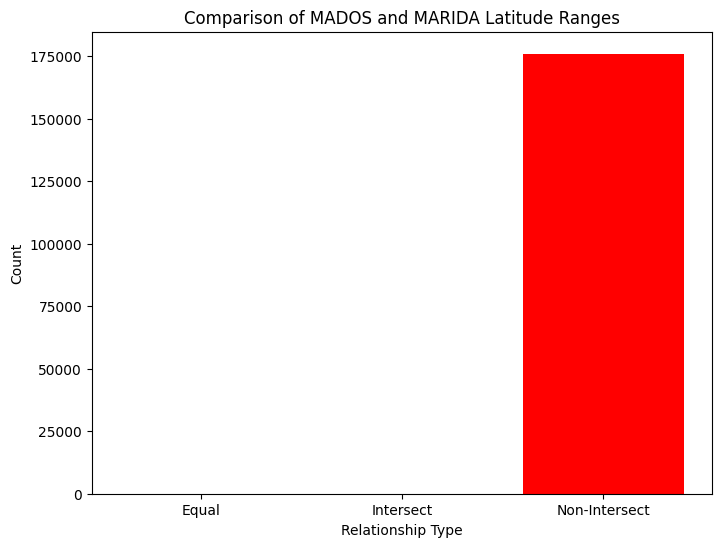

In [ ]:
import numpy as np
import rasterio
import glob
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Define Marine Debris class
debris_class = 1

# Path to MADOS mask folder
mask_folder_mados = "/content/extracted_data_Mados/cl"

# Get all _cl files in MADOS dataset
mask_files_mados = glob.glob(os.path.join(mask_folder_mados, "*.tif"))

# Path to MARIDA folder (similar folder structure)
mask_folder_marida = "/content/extracted_data_Marida/cl"

# Get all _cl files in MARIDA dataset
mask_files_marida = glob.glob(os.path.join(mask_folder_marida, "*.tif"))

# Function to count Marine Debris (Class 1) pixels and extract geospatial information
def count_debris_and_get_geo(mask_path):
    with rasterio.open(mask_path) as src:
        mask = src.read(1)
        # Get the bounding box of the image (min_lon, min_lat, max_lon, max_lat)
        bounds = src.bounds
        # Extract latitude (min_lat, max_lat)
        min_lat, max_lat = bounds[1], bounds[3]

    debris_pixel_count = np.sum(mask == debris_class)  # Count only Class 1 pixels
    return debris_pixel_count, min_lat, max_lat

# Function to process and display results
def process_dataset(dataset_name, mask_files):
    print(f"Processing {dataset_name} images with marine debris...")

    # Process all files and store results
    debris_counts = {}
    for mask_path in mask_files:
        debris_count, min_lat, max_lat = count_debris_and_get_geo(mask_path)
        if debris_count > 0:  # Only keep files with marine debris
            file_name = os.path.basename(mask_path)
            debris_counts[file_name] = {
                'debris_count': debris_count,
                'min_lat': min_lat,
                'max_lat': max_lat
            }

    return debris_counts

# Process MADOS and MARIDA datasets
mados_debris = process_dataset("MADOS", mask_files_mados)
marida_debris = process_dataset("MARIDA", mask_files_marida)

# Function to classify relationships based on latitude range comparison
def classify_relationship(mados_data, marida_data):
    equal = 0
    intersect = 0
    non_intersect = 0

    # Compare latitude ranges between MADOS and MARIDA
    for mados_file, mados_info in mados_data.items():
        mados_min_lat, mados_max_lat = mados_info['min_lat'], mados_info['max_lat']

        for marida_file, marida_info in marida_data.items():
            marida_min_lat, marida_max_lat = marida_info['min_lat'], marida_info['max_lat']

            # Check if latitude ranges are exactly equal
            if mados_min_lat == marida_min_lat and mados_max_lat == marida_max_lat:
                equal += 1
            # Check if latitude ranges intersect
            elif (mados_max_lat >= marida_min_lat and mados_min_lat <= marida_max_lat):
                intersect += 1
            # If no intersection
            else:
                non_intersect += 1

    return equal, intersect, non_intersect

# Classify relationships
equal, intersect, non_intersect = classify_relationship(mados_debris, marida_debris)

# Plot the results using a bar plot
def plot_relationships(equal, intersect, non_intersect):
    labels = ['Equal', 'Intersect', 'Non-Intersect']
    values = [equal, intersect, non_intersect]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['green', 'orange', 'red'])
    plt.title('Comparison of MADOS and MARIDA Latitude Ranges')
    plt.xlabel('Relationship Type')
    plt.ylabel('Count')
    plt.show()

# Plot the results
plot_relationships(equal, intersect, non_intersect)


Extract and identify marine debris class images from MADOS.

Copy the corresponding images (cl, conf, and image) from MADOS into the MARIDA folder structure.

Ensure that the files in MARIDA are integrated with only marine debris data from MADOS.

In [ ]:
import os
import shutil
import glob
import rasterio

# Define directories
mados_cl_folder = "/content/extracted_data_Mados/cl"
mados_conf_folder = "/content/extracted_data_Mados/conf"
mados_images_folder = "/content/extracted_data_Mados/images"

integrated_cl_folder = "/content/integrated_data/cl"
integrated_conf_folder = "/content/integrated_data/conf"
integrated_images_folder = "/content/integrated_data/images"

# Create the integrated folders if they do not exist
os.makedirs(integrated_cl_folder, exist_ok=True)
os.makedirs(integrated_conf_folder, exist_ok=True)
os.makedirs(integrated_images_folder, exist_ok=True)

# Function to check if marine debris (class 1) exists in a mask file
def is_debris(mask_path):
    with rasterio.open(mask_path) as src:
        mask = src.read(1)
    debris_pixel_count = np.sum(mask == 1)  # Class 1 is marine debris
    return debris_pixel_count > 0

# Get all MADOS _cl files (mask files) representing marine debris
mados_cl_files = glob.glob(os.path.join(mados_cl_folder, "*.tif"))
mados_debris_files = [f for f in mados_cl_files if is_debris(f)]

# Iterate through MADOS debris files and copy the corresponding files to the integrated folder
for cl_file in mados_debris_files:
    # Get the basename (filename without extension)
    basename = os.path.basename(cl_file).replace('_cl.tif', '')

    # Copy the corresponding conf and images files from MADOS
    conf_file = os.path.join(mados_conf_folder, basename + '_conf.tif')
    images_file = os.path.join(mados_images_folder, basename + '.tif')

    # Debugging: Check if the conf and images files exist
    if not os.path.exists(conf_file):
        print(f"Missing conf file for {basename}: {conf_file}")
    if not os.path.exists(images_file):
        print(f"Missing images file for {basename}: {images_file}")

    if os.path.exists(conf_file) and os.path.exists(images_file):
        # Copy files to the integrated dataset folder
        shutil.copy(cl_file, os.path.join(integrated_cl_folder, basename + '_cl.tif'))
        shutil.copy(conf_file, os.path.join(integrated_conf_folder, basename + '_conf.tif'))
        shutil.copy(images_file, os.path.join(integrated_images_folder, basename + '.tif'))
        print(f"Added {basename} with debris data from MADOS to integrated dataset.")
    else:
        print(f"Skipping {basename} as corresponding conf or images files do not exist.")

print("Integration complete.")


Missing conf file for Scene_166_L2R_cl_4.tif: /content/extracted_data_Mados/conf/Scene_166_L2R_cl_4.tif_conf.tif
Missing images file for Scene_166_L2R_cl_4.tif: /content/extracted_data_Mados/images/Scene_166_L2R_cl_4.tif.tif
Skipping Scene_166_L2R_cl_4.tif as corresponding conf or images files do not exist.
Missing conf file for Scene_1_L2R_cl_24.tif: /content/extracted_data_Mados/conf/Scene_1_L2R_cl_24.tif_conf.tif
Missing images file for Scene_1_L2R_cl_24.tif: /content/extracted_data_Mados/images/Scene_1_L2R_cl_24.tif.tif
Skipping Scene_1_L2R_cl_24.tif as corresponding conf or images files do not exist.
Missing conf file for Scene_19_L2R_cl_3.tif: /content/extracted_data_Mados/conf/Scene_19_L2R_cl_3.tif_conf.tif
Missing images file for Scene_19_L2R_cl_3.tif: /content/extracted_data_Mados/images/Scene_19_L2R_cl_3.tif.tif
Skipping Scene_19_L2R_cl_3.tif as corresponding conf or images files do not exist.
Missing conf file for Scene_42_L2R_cl_4.tif: /content/extracted_data_Mados/conf/Sce

Baseline Modeling

Prepare  Dataset:

Input Images: These are  satellite images (e.g., from the images folder).

Masks: These are the class masks (e.g., from the cl folder) indicating where marine debris is present.

Data Preprocessing:

Resize images and masks to the same size (e.g., 256x256 or 512x512 pixels).

Normalize pixel values to the range [0, 1].

Convert masks to binary values (1 for marine debris, 0 for non-debris).

Model

 Dataset Class Implementation

In [ ]:
import os
import numpy as np
import rasterio
import torch
from torch.utils.data import Dataset

class MARIDADataset(Dataset):
    def __init__(self, root_dir, split="train", debug=False, oversample=True):
        self.root_dir = root_dir
        self.split = split
        self.debug = debug
        self.oversample = oversample

        # 1. Load split file
        split_file = os.path.join(root_dir, "splits", f"{split}_X.txt")
        with open(split_file, 'r') as f:
            self.patch_names = [line.strip() for line in f.readlines()]

        # 2. Find valid files and track debris samples
        self.valid_samples = []
        self.debris_indices = []

        for idx, name in enumerate(self.patch_names):
            scene = f"S2_{name.split('_')[0]}_{name.split('_')[1]}"
            img_path = os.path.join(root_dir, "patches", scene, f"S2_{name}.tif")
            mask_path = os.path.join(root_dir, "patches", scene, f"S2_{name}_cl.tif")

            if os.path.exists(img_path) and os.path.exists(mask_path):
                self.valid_samples.append((img_path, mask_path))

                # Check if mask contains debris
                with rasterio.open(mask_path) as src:
                    if np.any(src.read(1) == 1):
                        self.debris_indices.append(len(self.valid_samples)-1)
            else:
                if debug:
                    print(f"Missing files for: {name}")

        # 3. Oversample debris samples if enabled
        if oversample and len(self.debris_indices) > 0:
            if debug:
                print(f"Original samples: {len(self.valid_samples)}")
                print(f"Debris samples: {len(self.debris_indices)}")

            extra_samples = [self.valid_samples[i] for i in self.debris_indices * 3]  # 3x oversampling
            self.valid_samples.extend(extra_samples)

            if debug:
                print(f"After oversampling: {len(self.valid_samples)}")

    def __len__(self):
        return len(self.valid_samples)

    def __getitem__(self, idx):
        img_path, mask_path = self.valid_samples[idx]

        # 1. Load and normalize image
        with rasterio.open(img_path) as src:
            image = np.nan_to_num(src.read()).astype(np.float32)
            for band in range(image.shape[0]):
                band_data = image[band]
                if np.max(band_data) > np.min(band_data):
                    image[band] = (band_data - np.min(band_data)) / (np.max(band_data) - np.min(band_data))
                else:
                    image[band] = 0

        # 2. Load mask
        with rasterio.open(mask_path) as src:
            mask = (src.read(1) == 1).astype(np.float32)

        # 3. Debug output
        if self.debug and idx < 3:  # Print first 3 samples
            print(f"\nSample {idx} debug:")
            print(f"Image path: {img_path}")
            print(f"Image shape: {image.shape} range: [{image.min()}, {image.max()}]")
            print(f"Mask debris pixels: {mask.sum()}")

        return torch.from_numpy(image), torch.from_numpy(mask).unsqueeze(0)

# Usage example
if __name__ == "__main__":
    dataset = MARIDADataset(
        root_dir="/content/marida_data",
        split="train",
        debug=True,
        oversample=True
    )

    print(f"\nFinal dataset size: {len(dataset)}")
    img, mask = dataset[0]
    print("\nFirst sample shapes:")
    print("Image:", img.shape)
    print("Mask:", mask.shape)

Original samples: 694
Debris samples: 190
After oversampling: 1264

Final dataset size: 1264

Sample 0 debug:
Image path: /content/marida_data/patches/S2_1-12-19_48MYU/S2_1-12-19_48MYU_0.tif
Image shape: (11, 256, 256) range: [0.0, 1.0]
Mask debris pixels: 0.0

First sample shapes:
Image: torch.Size([11, 256, 256])
Mask: torch.Size([1, 256, 256])


In [ ]:
# Check multiple samples for debris pixels
dataset = MARIDADataset(root_dir="/content/marida_data", split="train")
debris_found = 0

for i in range(min(100, len(dataset))):  # Fixed parenthesis
    _, mask = dataset[i]
    if torch.any(mask == 1):
        debris_found += 1

print(f"Debris-containing masks: {debris_found}/{min(100, len(dataset))}")  # Fixed here too

Debris-containing masks: 18/100


 Training Pipeline Implementation

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# 1. Initialize Dataset with Oversampling
train_dataset = MARIDADataset(
    root_dir="/content/marida_data",
    split="train",
    oversample=True,
    debug=True  # Keep debug on to verify
)

val_dataset = MARIDADataset(
    root_dir="/content/marida_data",
    split="val",
    oversample=False,  # No oversampling for validation
    debug=False
)

# 2. Data Loaders
batch_size = 8
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

# 3. Model Setup
class UNet(nn.Module):
    def __init__(self, in_channels=11, out_channels=1):
        super().__init__()
        # Encoder
        self.enc1 = self._block(in_channels, 64)
        self.enc2 = self._block(64, 128)
        self.enc3 = self._block(128, 256)
        self.pool = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = self._block(256, 512)

        # Decoder
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self._block(512, 256)  # Skip connection doubles channels
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self._block(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self._block(128, 64)

        self.out = nn.Conv2d(64, out_channels, kernel_size=1)

    def _block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool(enc1))
        enc3 = self.enc3(self.pool(enc2))

        # Bottleneck
        bottleneck = self.bottleneck(self.pool(enc3))

        # Decoder with skip connections
        dec3 = self.upconv3(bottleneck)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.dec3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.dec2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.dec1(dec1)

        return torch.sigmoid(self.out(dec1))

# 4. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet().to(device)

# Class-weighted loss (190 debris / 1264 total samples ≈ 15% positive)
pos_weight = torch.tensor([(1 - 0.15) / 0.15]).to(device)  # ≈5.67
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 5. Training Loop
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0

    for images, masks in loader:
        images = images.float().to(device)
        masks = masks.float().to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(loader)

def validate(model, loader, criterion, device):
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for images, masks in loader:
            images = images.float().to(device)
            masks = masks.float().to(device)

            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    return val_loss / len(loader)

# 6. Run Training
num_epochs = 20
best_val_loss = float('inf')

for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss = validate(model, val_loader, criterion, device)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_unet_model.pth')
        print("Saved new best model")

Original samples: 694
Debris samples: 190
After oversampling: 1264

Sample 1 debug:
Image path: /content/marida_data/patches/S2_1-12-19_48MYU/S2_1-12-19_48MYU_1.tif
Image shape: (11, 256, 256) range: [0.0, 1.0]
Mask debris pixels: 0.0

Sample 2 debug:
Image path: /content/marida_data/patches/S2_1-12-19_48MYU/S2_1-12-19_48MYU_2.tif
Image shape: (11, 256, 256) range: [0.0, 1.0]
Mask debris pixels: 7.0

Sample 0 debug:
Image path: /content/marida_data/patches/S2_1-12-19_48MYU/S2_1-12-19_48MYU_0.tif
Image shape: (11, 256, 256) range: [0.0, 1.0]
Mask debris pixels: 0.0
Epoch 1/20
Train Loss: 0.7332 | Val Loss: 0.6933
Saved new best model

Sample 0 debug:
Image path: /content/marida_data/patches/S2_1-12-19_48MYU/S2_1-12-19_48MYU_0.tif
Image shape: (11, 256, 256) range: [0.0, 1.0]
Mask debris pixels: 0.0

Sample 2 debug:
Image path: /content/marida_data/patches/S2_1-12-19_48MYU/S2_1-12-19_48MYU_2.tif
Image shape: (11, 256, 256) range: [0.0, 1.0]
Mask debris pixels: 7.0

Sample 1 debug:
Image 

Training Setup

1 Loss Function & Optimizer

In [1]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(in_channels=11).to(device)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

NameError: name 'torch' is not defined

Data Loader

In [ ]:
from torch.utils.data import DataLoader

batch_size = 8
train_loader = DataLoader(
    dataset,  #  MARIDADataset instance
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

In [ ]:
# Test one batch
for images, masks in train_loader:
    images = images.to(device)
    masks = masks.to(device)
    print("Batch shapes:")
    print("Images:", images.shape)  # Should be [8, 11, 256, 256]
    print("Masks:", masks.shape)    # Should be [8, 1, 256, 256]
    break

Batch shapes:
Images: torch.Size([8, 11, 256, 256])
Masks: torch.Size([8, 1, 256, 256])


Training Loop

In [ ]:
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0

    for images, masks in loader:
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(loader)

# Example usage
epoch_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
print(f"Training Loss: {epoch_loss:.4f}")